In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math

## Выбираем вариант (n) и рисуем график уравнения

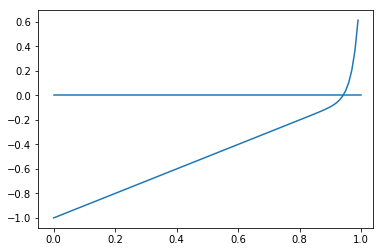

In [80]:
n = 7
x = np.arange(0, 1, 0.01)
y = x**(n+40) + x - 1
plt.plot(x, y)
ax = plt.gca()
l = mlines.Line2D([0,1], [0,0])
ax.add_line(l)
plt.show()

## Определяем функцию, ее производную и решаем с помощью метода Ньютона (метод касательных)

In [81]:
def f(x):
    return x**(n + 40) + x - 1
def derived_1_f(x):
    return (n+40) * x**(n+39) + 1
def Newton(xo):
    e = 10**10
    eps = 10 ** (-8)
    i = 0
    while e > eps:
        x = xo - f(xo)/derived_1_f(xo)
        print('X: ' + str(x) +'      ' + 'Y: '+ str(f(x)))
        e = abs(x - xo)
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x
try:
    x = Newton(1)
    print('Answer: ' + str(x))
except(Exception):
    print("This method does not feel for this equation")

X: 0.9791666666666666      Y: 0.35092538852351884
X: 0.9605444212656529      Y: 0.11131629724665437
X: 0.9472566611480665      Y: 0.02559608855774842
X: 0.9420190360029131      Y: 0.0023867751189925457
X: 0.9414241147354391      Y: 2.5782511322791635e-05
X: 0.9414175470320332      Y: 3.0828093411372492e-09
X: 0.9414175462465465      Y: 2.220446049250313e-16
Answer: 0.9414175462465465


## Теперь метод простых итераций

In [82]:
def f1(x):
    return x**(n+40) + x -1
def fi(x):
    return 1 - x**(n+40)
def simple_iteration_method(xo):
    eps = 10 ** (-8)
    e = 10**10
    i = 0
    while e > eps:
        x = fi(xo)
        print('X: ' + str(x) +'      ' + 'Y: '+ str(f1(x)))
        e = abs(x - xo)
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x
try:
    x = simple_iteration_method(0.9)
    print('Answer: ' + str(x))
except(Exception):
    print("This method does not feel for this equation")

X: 0.9929303495098489      Y: 0.7093754422573015
X: 0.2835549072525474      Y: -0.7164450927474526
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1.0      Y: 1.0
X: 0.0      Y: -1.0
X: 1

## Метод Ньютона для нескольких уравнений

In [83]:
def function_f(x, y):
    return x**(n+17) + x*y - 1
def function_g(x, y):
    return y**(n+1) + x*y - 1
def derivate_f_x(x, y):
    return (n+17) * x**(n+16) + y
def derivate_f_y(x, y):
    return x
def derivate_g_x(x, y):
    return y
def derivate_g_y(x, y):
    return (n+1) * y**n + x
def Newton_2(xo):
    eps = 10 ** (-8)
    e = 10**10
    i = 0
    while e > eps:
        A = np.array([derivate_f_x(xo[0], xo[1]), derivate_f_y(xo[0], xo[1]),
             derivate_g_x(xo[0], xo[1]), derivate_g_y(xo[0], xo[1])]).reshape(2, 2)
        b = -np.array([function_f(xo[0], xo[1]), function_g(xo[0], xo[1])])
        del_x = np.linalg.solve(A, b)
        x = xo + del_x
        e = abs(x - xo).max()
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x
try:
    x = Newton_2(np.array([-2, 2]))
    print(x)
except(Exception):
    print("This method does not feel for this equation")
        

[-1.03210189  1.09943035]


## Метод простых итераций для нескольких уравнений 

In [84]:
def fi_f(x, y):
    return math.pow(1 - x*y, n+17)
def fi_g(x, y):
    return math.pow(1 - x*y, n+1)
def simple_iteration_method_2(xo):
    eps = 10 ** (-8)
    e = 10**10
    i = 0
    while e > eps:
        x[0] = fi_f(xo[0], xo[1])
        x[1] = fi_g(xo[0], xo[1])
        e = abs(x - xo).max()
        xo = x
        i += 1
        if i == 50:
            raise(Exception)
    return x
try:
    x = Newton_2(np.array([1, 1]))
    print(x)
except(Exception):
    print("This method does not feel for this equation")

[0.93919853 0.82846126]
